## **1. Loading the dataset**

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE


In [5]:
df = pd.DataFrame(X)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


##**2. Performing EDA**

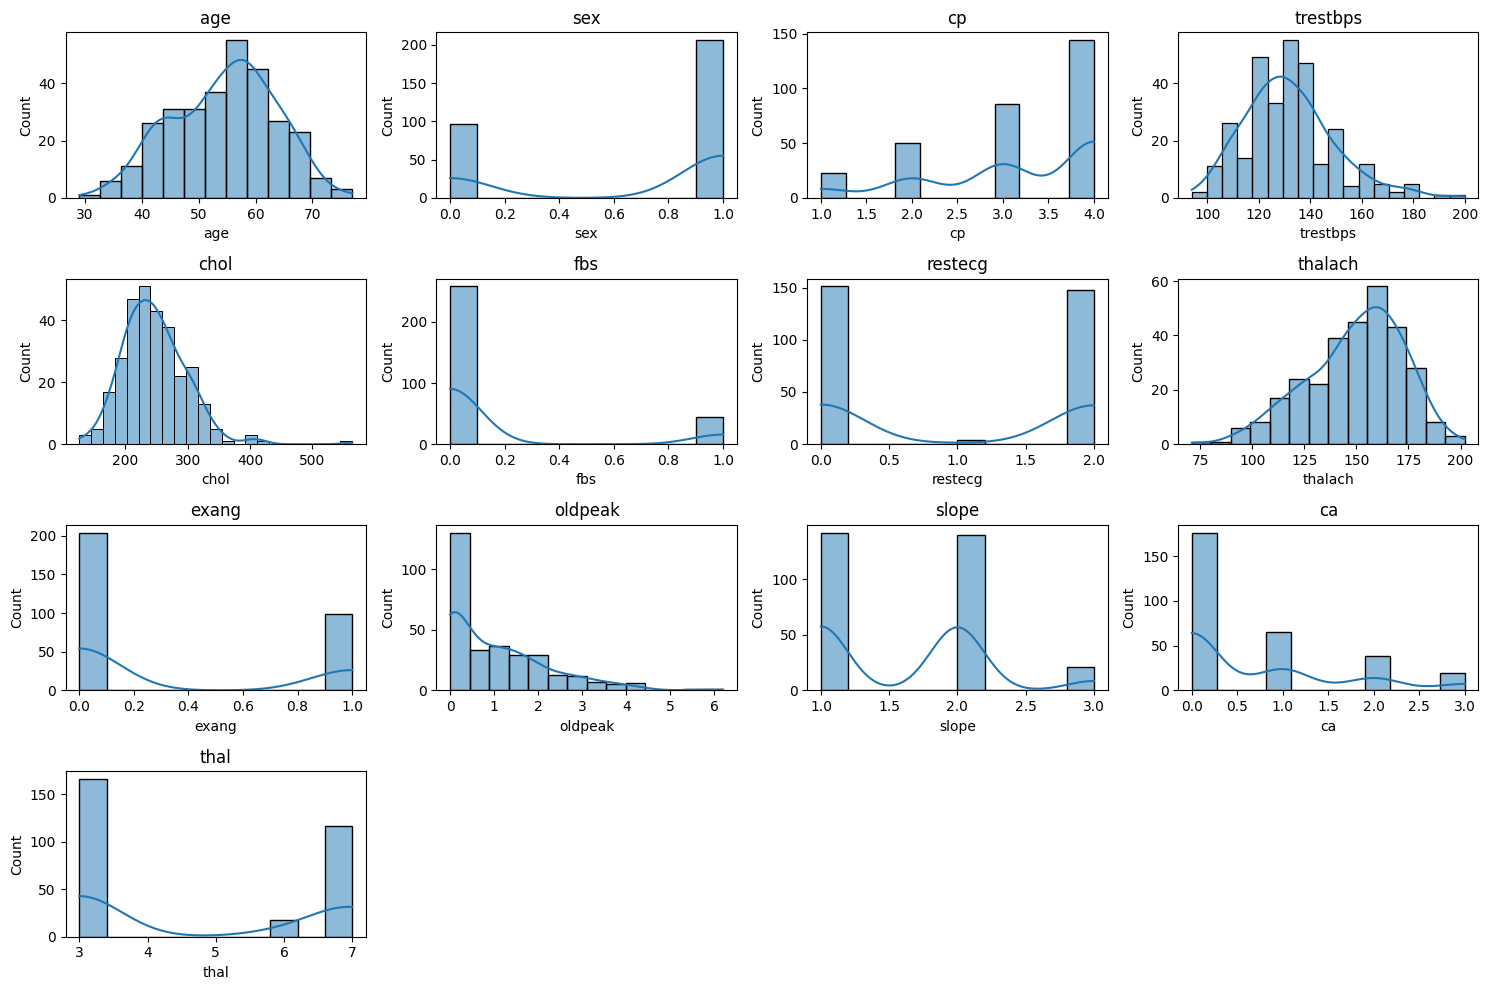

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

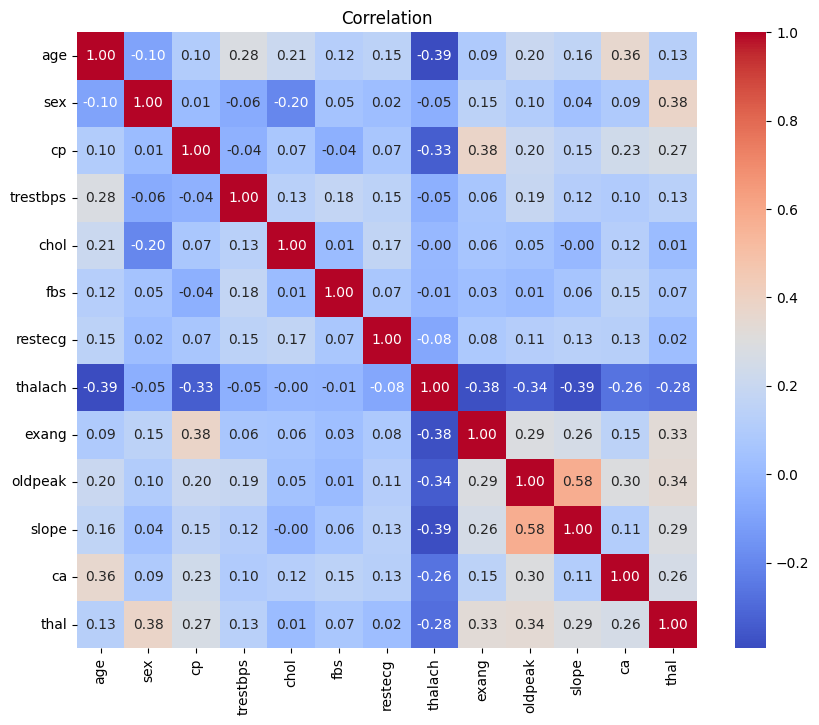

In [12]:
# Visualization using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation')
plt.show();

## **3. Preprocessing**

In [13]:
# Checking for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
# Dropping missing values
df = df.dropna()

In [15]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [16]:
# encoding categorical features
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [17]:
# scaling numerical features
scaler = StandardScaler()
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[num_col] = scaler.fit_transform(df[num_col])

## **4. K-means clustering**

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df[num_col])

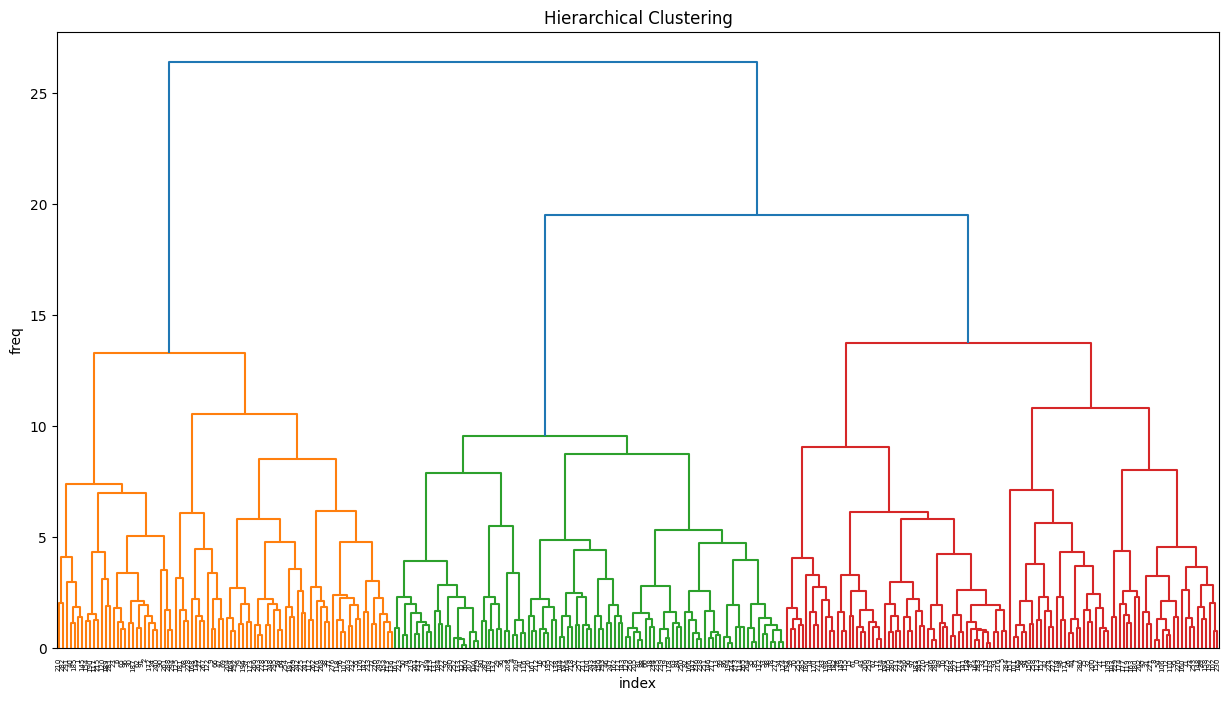

In [21]:
# hierarchical clustering
plt.figure(figsize=(15, 8))
dendrogram(linkage(df[num_col], method='ward'))
plt.title('Hierarchical Clustering')
plt.xlabel('index')
plt.ylabel('freq')
plt.show();

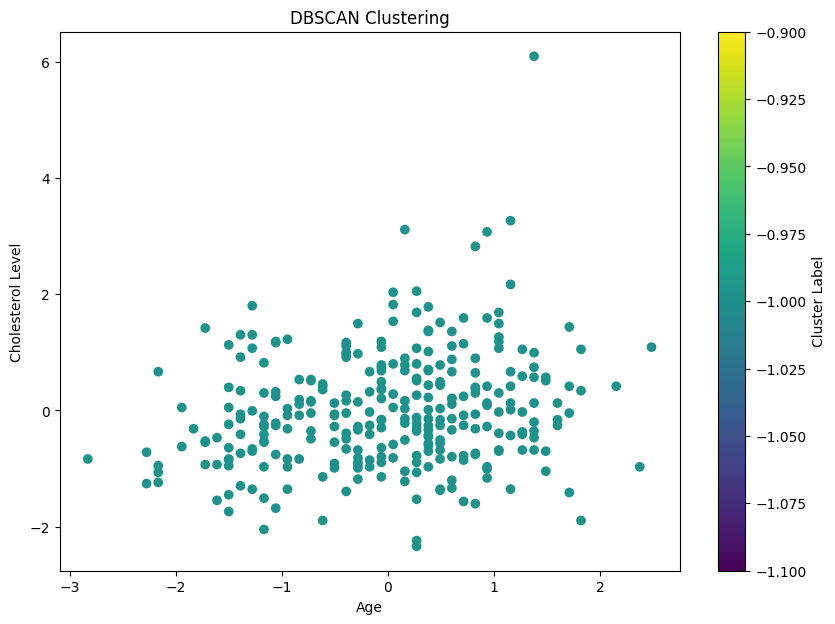

In [36]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df[num_col])

plt.figure(figsize=(10, 7))
plt.scatter(df['age'], df['chol'], c=df['dbscan_cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.colorbar(label='Cluster Label')
plt.show();

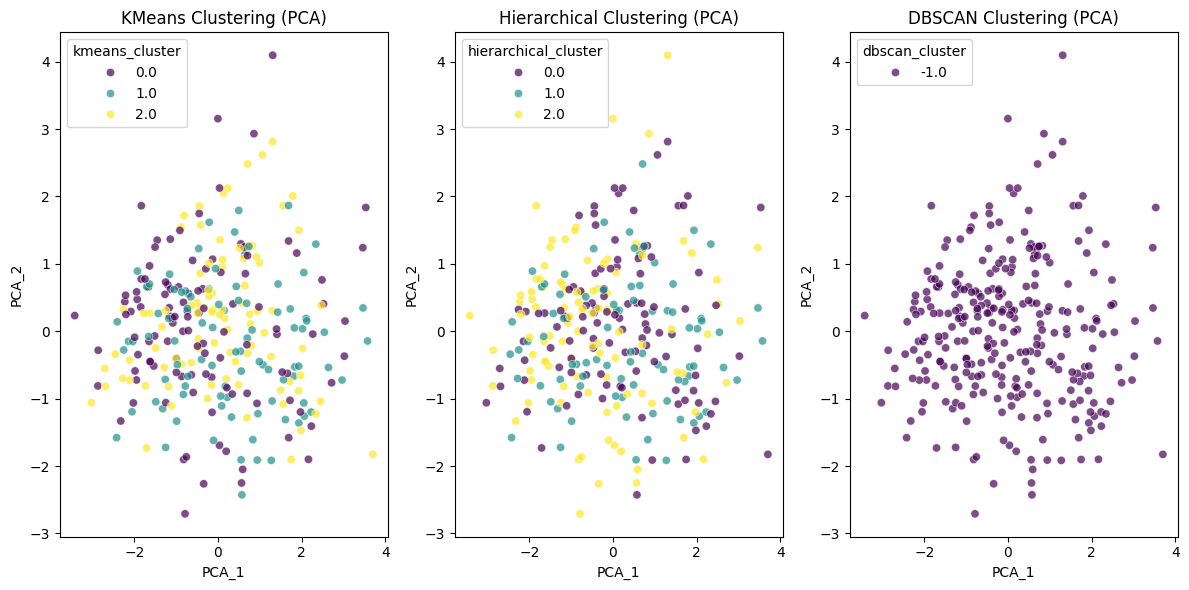

In [29]:
# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[num_col])

# Creating a DataFrame with PCA results and cluster labels
df['kmeans_cluster'] = kmeans_labels
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['kmeans_cluster'] = df['kmeans_cluster']
pca_df['hierarchical_cluster'] = df['hierarchical_cluster']
pca_df['dbscan_cluster'] = df['dbscan_cluster']

# Visualizing KMeans Clusters using PCA
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering (PCA)')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

# Visualizing Hierarchical Clusters using PCA
plt.subplot(1, 3, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='hierarchical_cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

# Visualizing DBSCAN Clusters using PCA
plt.subplot(1, 3, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='dbscan_cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

plt.tight_layout()
plt.show();

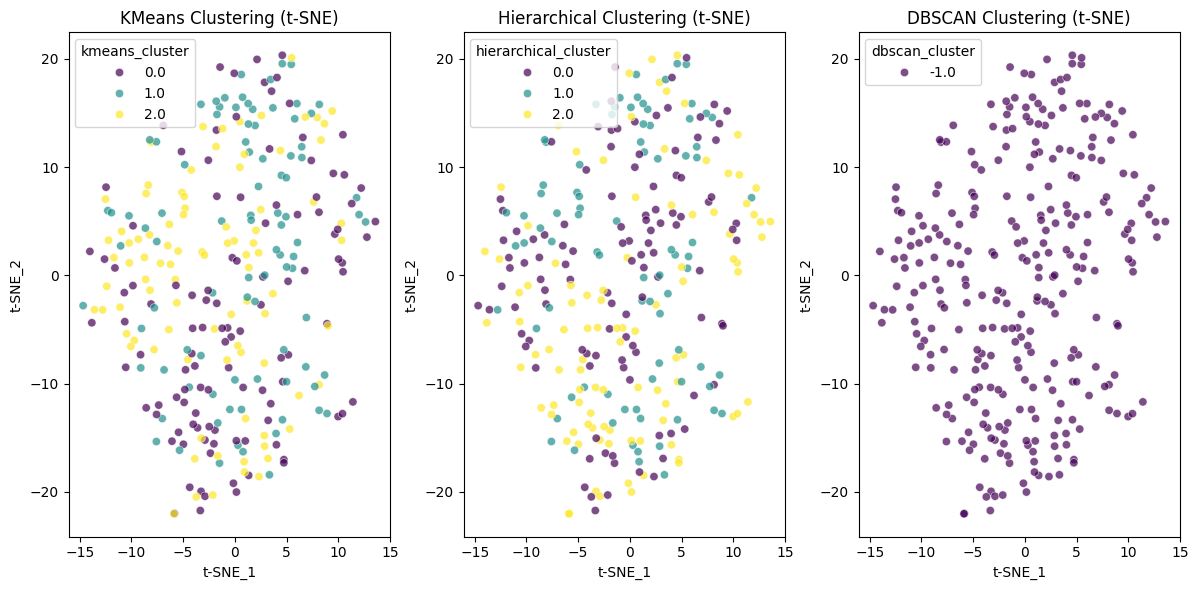

In [30]:
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df[num_col])

# Creating a DataFrame with t-SNE results and cluster labels
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['kmeans_cluster'] = df['kmeans_cluster']
tsne_df['hierarchical_cluster'] = df['hierarchical_cluster']
tsne_df['dbscan_cluster'] = df['dbscan_cluster']

# Visualizing KMeans Clusters using t-SNE
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='kmeans_cluster', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering (t-SNE)')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')

# Visualizing Hierarchical Clusters using t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='hierarchical_cluster', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering (t-SNE)')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')

# Visualizing DBSCAN Clusters using t-SNE
plt.subplot(1, 3, 3)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dbscan_cluster', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')

plt.tight_layout()
plt.show();

## **6. Gaussian Mixture Models**

In [45]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df[num_col])
gmm_labels = gmm.fit_predict(df[num_col])

df['gmm_cluster'] = gmm.predict(df[num_col])

means = gmm.means_
print("risk factors:")
print(means)

means_df = pd.DataFrame(means, columns=num_col)
means_df.index = [f'cluster {i+1}' for i in range(means_df.shape[0])]

print("cluster means:")
print(means_df)

risk factors:
[[-0.32624036 -0.03454215 -0.11115696  0.24557932 -0.19285533 -0.72197605]
 [ 0.57697296  0.08547147  0.11049458 -0.57141353  0.57693925  1.24819978]
 [ 0.10336399 -0.05939752  0.28359413  0.31770721 -0.61936544  0.3114081 ]]
cluster means:
                age  trestbps      chol   thalach   oldpeak        ca
cluster 1 -0.326240 -0.034542 -0.111157  0.245579 -0.192855 -0.721976
cluster 2  0.576973  0.085471  0.110495 -0.571414  0.576939  1.248200
cluster 3  0.103364 -0.059398  0.283594  0.317707 -0.619365  0.311408


## **7. Clustering Evaluation**

In [47]:
# silhouette_score

# Extracting cluster labels
kmeans_labels = df['kmeans_cluster']
hierarchical_labels = df['hierarchical_cluster']
dbscan_labels = df['dbscan_cluster']

# Calculating Silhouette Scores
silhouette_kmeans = silhouette_score(df[num_col], kmeans_labels)
silhouette_hierarchical = silhouette_score(df[num_col], hierarchical_labels)
silhouette_gmm = silhouette_score(df[num_col], gmm_labels)
# silhouette_dbscan = silhouette_score(df[num_col], dbscan_labels)

print(f'Silhouette score for KMeans is: {silhouette_kmeans}')
print(f'Silhouette score for hierarchical is: {silhouette_hierarchical}')
print(f'Silhouette score for GMM is: {silhouette_gmm}')
# print(f'Silhouette score for DBSCAN: {silhouette_dbscan}')

Silhouette score for KMeans is: 0.18206237481424556
Silhouette score for hierarchical is: 0.15052314848509715
Silhouette score for GMM is: 0.08284964104956273


In [48]:
# Davies-Bouldin index
dbi_kmeans = davies_bouldin_score(df[num_col], kmeans_labels)
dbi_hierarchical = davies_bouldin_score(df[num_col], hierarchical_labels)
dbi_gmm = davies_bouldin_score(df[num_col], gmm_labels)
# dbi_dbscan = davies_bouldin_score(df[num_col], dbscan_labels)

print(f'Davies-Bouldin index for KMeans is: {dbi_kmeans}')
print(f'Davies-Bouldin index for Hierarchical is: {dbi_hierarchical}')
print(f'Davies-Bouldin index for GMM is: {dbi_gmm}')
# print(f'Davies-Bouldin Index for DBSCAN: {dbi_dbscan}')

Davies-Bouldin index for KMeans is: 1.839774853478671
Davies-Bouldin index for Hierarchical is: 1.9886278110926863
Davies-Bouldin index for GMM is: 2.761569403558924


## **8. Comparison and Conclusion**

1. K-means performed the best as compared to the others: It has the highest Silhouette Score of 0.182 and the lowest Davies-Bouldin Index of 1.840. Although its performance is not excellent, it managed to find some structure in the data, indicating that there are some underlying patterns among the patients in the heart disease dataset.


2. Hierarchical Clustering showed moderate performance: It achieved a Silhouette Score of 0.151 and a Davies-Bouldin Index of 1.989. While it didn't perform so well, it still demonstrated some ability to group similar patients together, with more overlap between clusters as compared to K-means.


3. GMM performed poorly: Its low Silhouette Score of 0.083 and high Davies-Bouldin Index of 2.762 suggest that the Gaussian components heavily overlap that led to ineffective clustering results.

4. DBSCAN was unsuitable for this dataset.